#**Assignment 4 LSTM for Text Classification**

#**SMS Spam Classification**

#Name: Anlin Bernishia S
#Reg No: 612919104008

#**Import Necessary Libraries**

In [ ]:
import numpy as numpy
import pandas as pd
import nltk

#**Reading the Data Set and doing pre processing**

In [84]:
sms = pd.read_csv('/content/drive/MyDrive/SPAM DETECTION/spam.csv', encoding = 'latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [85]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
sms=sms.rename(columns={"v1":"label", "v2": "text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#**Explore the Data**

In [86]:
print("No of rows", len(sms))

No of rows 5572


In [87]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [88]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [89]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#**Plot**

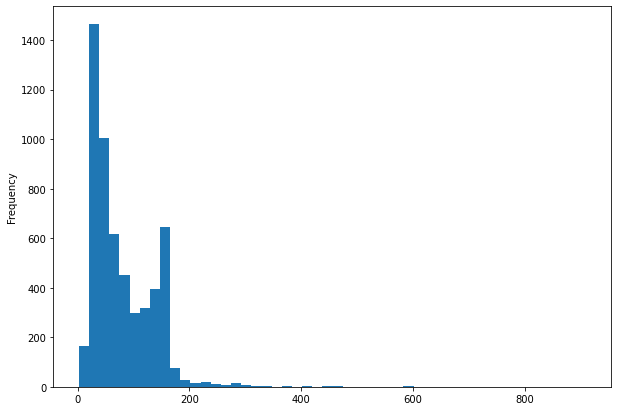

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=50, kind='hist', figsize = (10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa944562e90>,
      dtype=object)

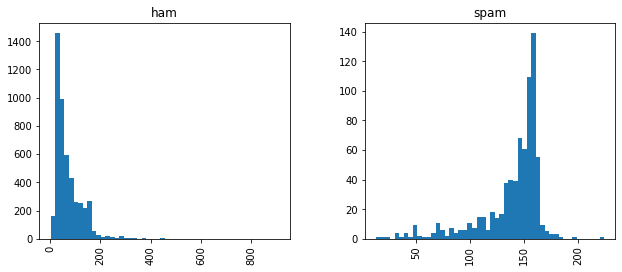

In [91]:
sms.hist(column = 'length', by = 'label', bins = 50, figsize = (10,4))

In [92]:
sms.loc[:, 'label'] = sms.label.map({'ham': 0, 'spam' : 1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#**Implement Bag of Words**

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
input = ['Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged']
text = count.fit_transform(sms['text'], input)

x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size = 0.20, random_state = 1)

In [94]:
print(x_train.shape)
print(x_test.shape)

input = text[5571]

(4457, 8672)
(1115, 8672)


#**Implementation of ML Model**

In [95]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [96]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


#***MultinomialNB***

In [97]:
|from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("MultinomialNB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)))
print("Precision score: {}". format(precision_score(y_test, prediction)))
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MultinomialNB
Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
F1 score: 0.9160839160839161


#***BernoulliNB***

In [98]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [99]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("BernoulliNB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)))
print("Precision score: {}". format(precision_score(y_test, prediction)))
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

BernoulliNB
Accuracy score: 0.9865470852017937
Precision score: 0.984375
Recall score: 0.9064748201438849
F1 score: 0.9438202247191011


#***MLPClassifier***

In [101]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(x_train, y_train)


MLPClassifier()

In [102]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("MLPClassifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)))
print("Precision score: {}". format(precision_score(y_test, prediction)))
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLPClassifier
Accuracy score: 0.9937219730941704
Precision score: 1.0
Recall score: 0.9496402877697842
F1 score: 0.974169741697417


In [104]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [106]:
model.predict(input)

array([0])

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
input = ['This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.']
text = count.fit_transform(sms['text'], input)

x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size = 0.20, random_state = 1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [109]:
print(x_train.shape)
print(x_test.shape)

input = text[5571]

(4457, 8672)
(1115, 8672)


In [110]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [111]:
model.predict(input)

array([0])

In [123]:
data = sms['text']
input = "To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"

In [124]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [117]:
data.loc[len(data.index)] = "To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"

In [118]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    To get 2.50 pounds free call credit and detail...
Name: text, Length: 5573, dtype: object

In [119]:
text = count.fit_transform(data)

In [120]:
text

<5573x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73939 stored elements in Compressed Sparse Row format>

In [121]:
input = text[5572]

In [122]:
model.predict(input)

array([1])